# Project 1: Data Cleaning, Visualization, and Mining

In [59]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# additional imports
%matplotlib inline
import seaborn as sns
sns.set()

import datetime as dt
import matplotlib.dates as mdates
import missingno as msno
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import statsmodels.api as sm
# import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Setup, Cleaning, Organizing, and Exploring the Data

Let's now try to read in the data, clean up the data by getting rid of NAs, and explore the data. Feel free to use any commands to do these parts. As always, report your steps in the writeup.

In [60]:
df = pd.read_csv('acs2015_county_data.csv')
df['PrimaryOccupation'] = df[['Professional', 'Service', 'Office', 'Construction', 'Production']].idxmax(axis=1)
df['PrimaryRace'] = df[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].idxmax(axis=1)
df['Income (in thousands)'] = [i / 1000 for i in df['Income']]
df

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,PrimaryOccupation,PrimaryRace,Income (in thousands)
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,26.5,23986,73.6,20.9,5.5,0.0,7.6,Professional,White,51.281
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,26.4,85953,81.5,12.3,5.8,0.4,7.5,Professional,White,50.254
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,24.1,8597,71.8,20.8,7.3,0.1,17.6,Professional,Black,32.964
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,28.8,8294,76.8,16.1,6.7,0.4,8.3,Production,White,38.678
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,34.9,22189,82.0,13.5,4.2,0.4,7.7,Professional,White,45.813
5,1011,Alabama,Bullock,10678,5660,5018,4.4,22.2,70.7,1.2,...,27.5,3865,79.5,15.1,5.4,0.0,18.0,Production,Black,31.938
6,1013,Alabama,Butler,20354,9502,10852,1.2,53.3,43.8,0.1,...,24.6,7813,77.4,16.2,6.2,0.2,10.9,Professional,White,32.229
7,1015,Alabama,Calhoun,116648,56274,60374,3.5,73.0,20.3,0.2,...,24.1,47401,74.1,20.8,5.0,0.1,12.3,Professional,White,41.703
8,1017,Alabama,Chambers,34079,16258,17821,0.4,57.3,40.3,0.2,...,25.1,13689,85.1,12.1,2.8,0.0,8.9,Office,White,34.177
9,1019,Alabama,Cherokee,26008,12975,13033,1.5,91.7,4.8,0.6,...,27.4,10155,73.1,18.5,7.9,0.5,7.9,Professional,White,36.296


# Visualizing the Data

This is the most fun part of the project! Now you can go ahead and create your graphs (appropriately labeled of course), models, and other visualizations. Make sure you demonstrate your ability to create rich graphs by creating various different types of graphs, both for numerical as well as categorical data. 

Here are some types of graphs that you will want to create for this project. Remember to browse the online documentation for many Python graphing and visualization packages such as plotly, seaborn, and matplotlib if you need to borrow any code or get some help!
1. Creating multiple graphs that plot important financial indicators (y-axis) like the median annual income, per capita income, poverty rate, childhood poverty rate, and/or unemployment rate present in a particular county AGAINST several features in the dataset (x-axis) that might affect these factors, such as the total population of the county; the racial demographics of the county; or the occupations of different workers (professionals, service workers, construction, manufacturing).   

2. Using plotly as a graphing library to visualize these financial indicators in the 2015 American Community Survey data on a geographical map of the United States on a state-wide or county-based level (similar to what we did in class when we visualized global average temperatures for different countries on a global map). 

In [31]:
#df.drop('Drive', axis=1, inplace=True)
#df.drop('Carpool', axis=1, inplace=True)
#df.drop('Transit', axis=1, inplace=True)
#df.drop('Walk', axis=1, inplace=True)
#df.drop('IncomeErr', axis=1, inplace=True)
#df.drop('IncomePerCapErr', axis=1, inplace=True)
# msno.matrix(df)

#Income against Primary Industry
#df['PrimaryIndustry'] = df[['Professional', 'Service', 'Office', 'Construction', 'Production']].idxmax(axis=1)
#sns.barplot(x='PrimaryIndustry', y='Income', data=df)
#plt.show()

#df['DominantRace'] = df[['White', 'Black', 'Native', 'Asian', 'Pacific']].idxmax(axis=1)
#sns.barplot(x='DominantRace', y='IncomePerCap', data=df, hue='PrimaryIndustry')
#plt.show()

#df.loc[df['LargestNonWhitePopulation']=='Asian']
#df['LargestNonWhitePopulation'] = df[['Black', 'Native', 'Asian', 'Pacific']].idxmax(axis=1)
#sns.barplot(x='LargestNonWhitePopulation', y='Income', data=df)
#plt.show()


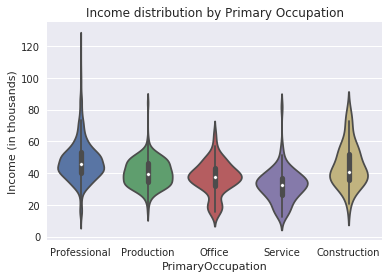

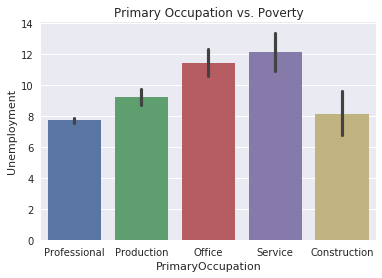

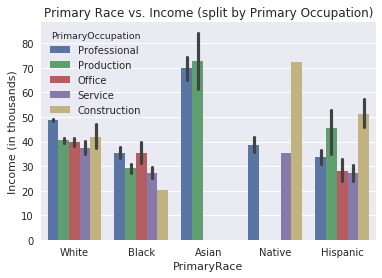

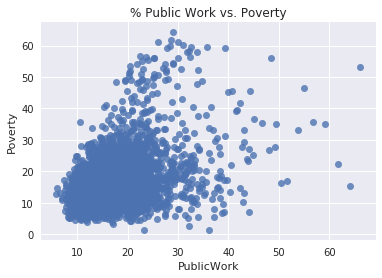

In [37]:
# 1-- Income distribution by PrimaryOccupation
plt.axes().set_title('Income distribution by Primary Occupation')
sns.violinplot(x='PrimaryOccupation', y='Income (in thousands)', data=df)

plt.show()


# 2-- PrimaryOccupation vs. Unemployment
plt.axes().set_title('Primary Occupation vs. Poverty')
sns.barplot(x='PrimaryOccupation', y='Unemployment', data=df)

plt.show()

# 3-- PrimaryRace vs. Income
plt.axes().set_title('Primary Race vs. Income (split by Primary Occupation)')
sns.barplot(x='PrimaryRace', y='Income (in thousands)', data=df, hue='PrimaryOccupation')

plt.show()

# 4-- TotalPop vs. Poverty
plt.axes().set_title('% Public Work vs. Poverty')
sns.regplot(x='PublicWork', y='Poverty', data=df, fit_reg=False)

## Cloropleth Map

In [62]:
ndf = df[['State', 'Income']]
states_names = np.unique(ndf['State'])
# print(states_names)
""" ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
     'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
     'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
     'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
     'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
     'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
     'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico' 'Rhode Island'
     'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
     'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming'] """

mean_income = []
for state in states_names:
    mean_income.append(ndf[ndf['State'] == state]['Income'].mean())

#using plotly
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO',
          'CT', 'DE', 'DC', 'FL', 'GA',
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY',
          'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
          'MS', 'MO', 'MT', 'NE', 'NV', 'NH',
          'NJ', 'NM', 'NY', 'NC', 'ND',
          'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
          'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
          'VA', 'WA', 'WV', 'WI', 'WY']

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
data = [dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = states,
        z = mean_income,
        text = states_names,
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = '2015 US Income by States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'),
             )
    
fig = go.Figure( data=data, layout=layout )
py.iplot(fig, validate = False, filename='cloropleth-map-on-income' )

# Linear Regression

Make sure you also demonstrate your ability to create regressions on your data. In this part of the project, you will pick 3 financial indicators (like the median annual income, per capita income, poverty rate, childhood poverty rate, and/or unemployment rate) in the dataset. You will then train 3 linear regression models in scikit-learn that attempt to predict these 3 financial indicators of a county from the rest of the data collected in the dataset. You should analyze the accuracy of your linear regression model and report important predictors or features in your dataset that had the highest effect size on these 3 financial indicators (as discovered by your regression model). 

Optional: You can try adding regularization to see if you can get better results. 

In [61]:
# 1-- Public Work vs. Poverty
x, y = df['PublicWork'], df['Poverty']
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True)

myOLS1 = sm.OLS(y_train, x_train).fit()
y_hat = myOLS1.predict(x_test)
mse = np.linalg.norm(y_test - y_hat)**2/len(y_test)
mse

NameError: name 'train_test_split' is not defined